In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
import warnings
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

warnings.filterwarnings("ignore")

In [2]:
# read file
data_file = "./winequality/winequality-white.csv"
df = pd.read_csv(data_file, sep=";")

#get X and y
X = df.drop(columns=['quality'])
y = df['quality']

# split dataset into train data(80%) and test data(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [3]:
# normalization
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [4]:
# standardization
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

In [9]:
pca = PCA(n_components=5)
pca.fit(X_train_normalized)
X_train_pca = pca.transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 32)                384       
                                                                 
 dense_83 (Dense)            (None, 32)                1056      
                                                                 
 dense_84 (Dense)            (None, 32)                1056      
                                                                 
 dense_85 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2529 (9.88 KB)
Trainable params: 2529 (9.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
31/31 [==============================] - 0s 950us/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

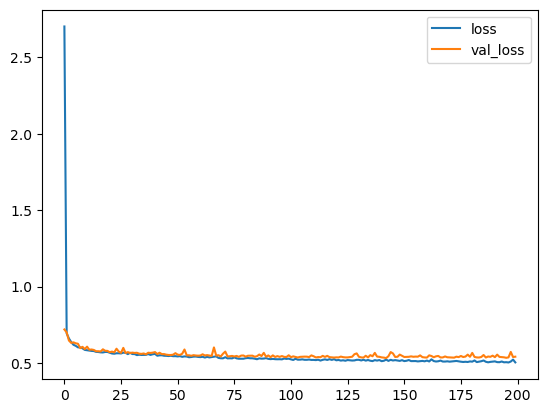

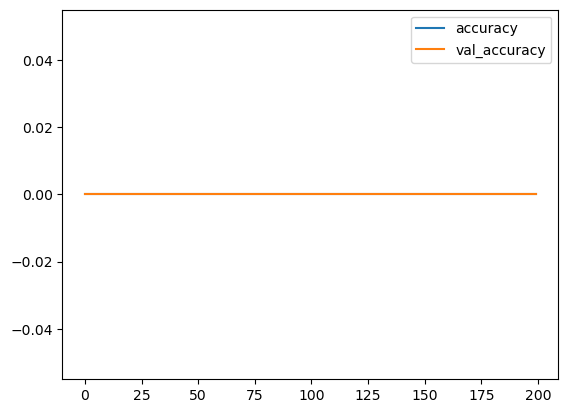

In [42]:
model = Sequential([
  Dense(32, activation='relu',input_shape=(11,)),
  Dense(32, activation='relu'),
  Dense(32, activation='relu'),
  Dense(1),
])

print(model.summary())  # to verify model structure


model.compile(loss='mae', optimizer ='adam', metrics=['accuracy'])

history = model.fit(X_train_normalized,y_train, validation_data=(X_test_normalized,y_test),
                    epochs=200, batch_size = 40, verbose=0)

history_df = pd.DataFrame(history.history)

history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 100), activation='relu')
mlp.fit(X_train_pca, y_train)
mlp_accuracy = mlp.score(X_test_pca, y_test)
print('神经网络模型的预测准确率：{:.2f}%'.format(mlp_accuracy * 100))

In [56]:
model = Sequential([
  Dense(20, activation='relu',input_shape=(11,)),
  Dense(40, activation='relu'),
  Dense(80, activation='relu'),
  Dense(100, activation='relu'),
  Dense(200, activation='relu'),
  Dense(500, activation='relu'),
  Dense(1),
])

def arrayround(arr,n=0):
    import numpy as np
    flag = np.where(arr>=0,1,-1)
    arr = np.abs(arr)
    arr10 = arr*10**(n+1)
    arr20 = np.floor(arr10)
    arr30 = np.where(arr20%10==5,(arr20+1)/10**(n+1),arr20/10**(n+1))
    result = np.around(arr30,n)
    return result*flag

model.compile(loss='mae', optimizer ='adam', metrics=['accuracy'])
print(model.summary())  # to verify model structure

accuracy_NN = []
recall_NN = []
f1_NN = []
precision_NN = []
for i in range(10,500,10):
    model.fit(X_train_normalized,y_train, epochs=i, batch_size = 40, verbose=0)

    y_pred = model.predict(X_test_normalized)
    y_pred = np.array(y_pred)
    y_pred = arrayround(y_pred)

    # score in this model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_NN.append([i,accuracy])
    recall = recall_score(y_test, y_pred, average='weighted')
    recall_NN.append([i,recall])
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_NN.append([i,f1])
    precision = precision_score(y_test, y_pred, average='weighted')
    precision_NN.append([i,precision])

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_149 (Dense)           (None, 20)                240       
                                                                 
 dense_150 (Dense)           (None, 40)                840       
                                                                 
 dense_151 (Dense)           (None, 80)                3280      
                                                                 
 dense_152 (Dense)           (None, 100)               8100      
                                                                 
 dense_153 (Dense)           (None, 200)               20200     
                                                                 
 dense_154 (Dense)           (None, 500)               100500    
                                                                 
 dense_155 (Dense)           (None, 1)               

best epochs and scores: [380.          0.6386343]


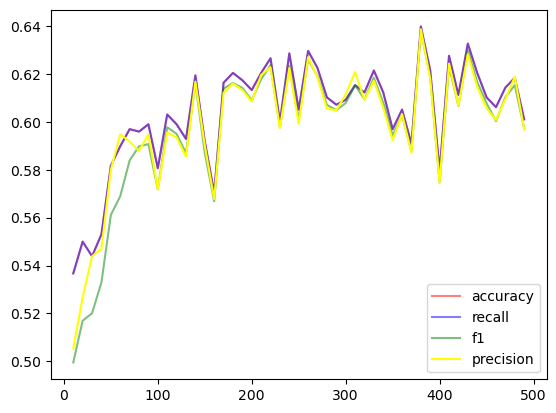

In [57]:
accuracy_NN = np.array(accuracy_NN)
recall_NN = np.array(recall_NN)
f1_NN = np.array(f1_NN)
precision_NN = np.array(precision_NN)

max_score = np.where(precision_NN==np.max(precision_NN[:,1]))[0][0]
print("best epochs and scores:",precision_NN[max_score]) 

plt.plot(accuracy_NN[:,0], accuracy_NN[:,1], color='red', alpha=0.5)
plt.plot(recall_NN[:,0], recall_NN[:,1], color='blue', alpha=0.5)
plt.plot(f1_NN[:,0], f1_NN[:,1], color='green', alpha=0.5)
plt.plot(precision_NN[:,0], precision_NN[:,1], color='yellow')
plt.legend(labels=["accuracy","recall","f1", "precision"],loc="lower right")
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 20)                120       
                                                                 
 dense_43 (Dense)            (None, 40)                840       
                                                                 
 dense_44 (Dense)            (None, 80)                3280      
                                                                 
 dense_45 (Dense)            (None, 100)               8100      
                                                                 
 dense_46 (Dense)            (None, 200)               20200     
                                                                 
 dense_47 (Dense)            (None, 500)               100500    
                                                                 
 dense_48 (Dense)            (None, 1)                

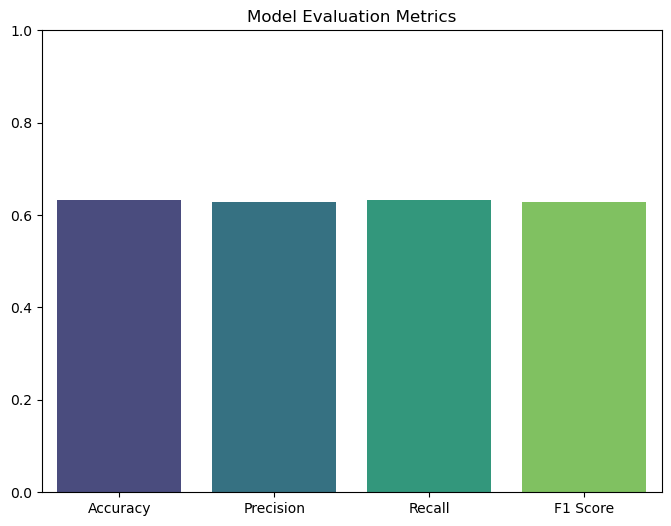

Random_Forest's Accuracy is: 0.6326530612244898
Random_Forest's Precision is:  0.6288197944594189
Random_Forest's Recall score is: 0.6326530612244898
Random_Forest's f1 score is: 0.6280268320410808


In [14]:
model = Sequential([
  Dense(20, activation='relu',input_shape=(5,)),
  Dense(40, activation='relu'),
  Dense(80, activation='relu'),
  Dense(100, activation='relu'),
  Dense(200, activation='relu'),
  Dense(500, activation='relu'),
  Dense(1),
])

def arrayround(arr,n=0):
    import numpy as np
    flag = np.where(arr>=0,1,-1)
    arr = np.abs(arr)
    arr10 = arr*10**(n+1)
    arr20 = np.floor(arr10)
    arr30 = np.where(arr20%10==5,(arr20+1)/10**(n+1),arr20/10**(n+1))
    result = np.around(arr30,n)
    return result*flag

model.compile(loss='mae', optimizer ='adam', metrics=['accuracy'])
print(model.summary())  # to verify model structure

model.fit(X_train_pca,y_train, epochs=300, batch_size = 40, verbose=0)

y_pred = model.predict(X_test_pca)
y_pred = np.array(y_pred)
y_pred = arrayround(y_pred)

# score in this model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

print("Random_Forest's Accuracy is:", accuracy)
print("Random_Forest's Precision is: ", precision)
print("Random_Forest's Recall score is:", recall)
print("Random_Forest's f1 score is:", f1)

In [ ]:
model = Sequential([
  Dense(20, activation='relu',input_shape=(11,)),
  Dense(40, activation='relu'),
  Dense(80, activation='relu'),
  Dense(100, activation='relu'),
  Dense(200, activation='relu'),
  Dense(500, activation='relu'),
  Dense(1),
])